# Demo plots for provided response functions to quantify radio neutrino detectors with `toise`

In [64]:
from toise import radio_response
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (6,5)

## Analysis efficiency

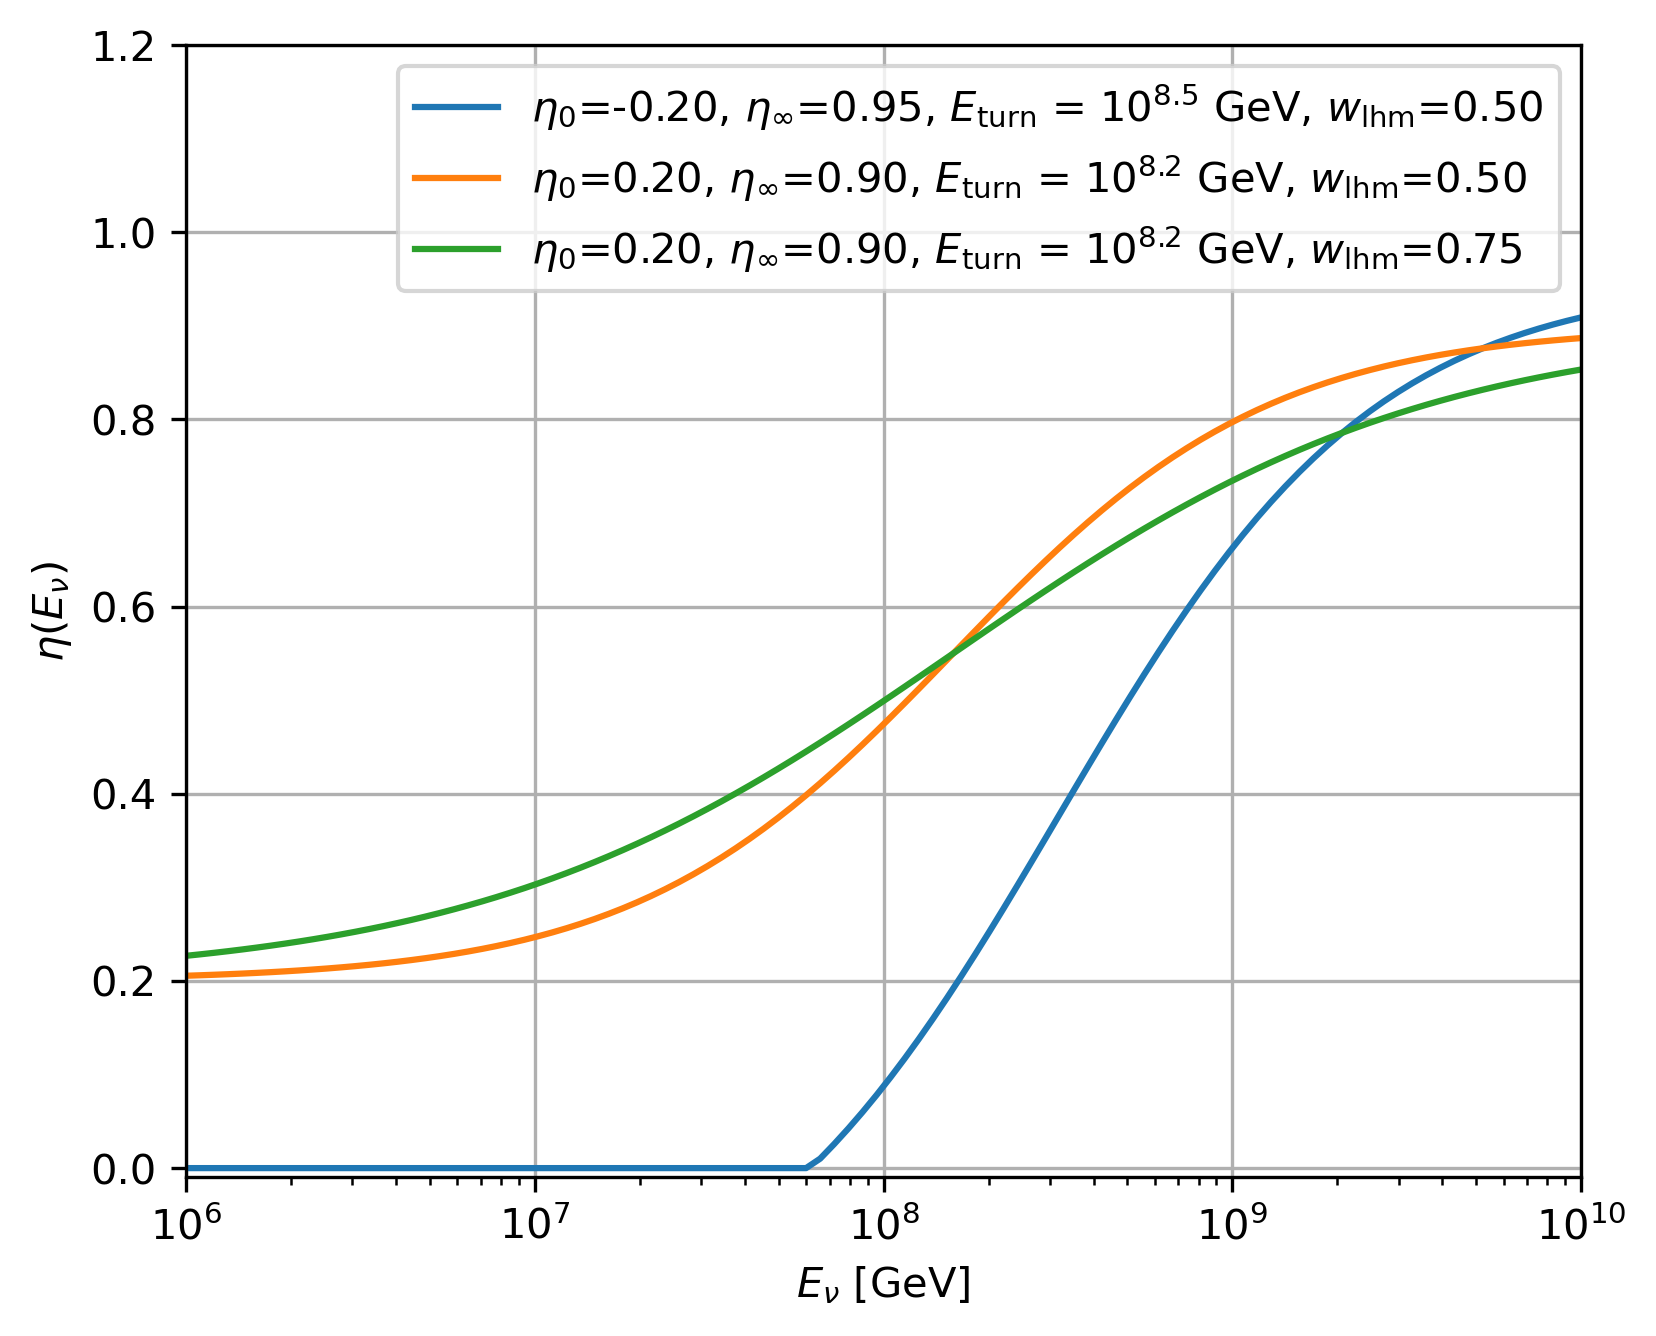

In [38]:
energies = np.logspace(6,10,100)

par_sets = [[ -0.2, 0.95, 8.5, 0.5],[0.2, 0.9, 8.2, 0.5],[0.2, 0.9, 8.2, 0.75]]
for eta0, etainf, logeturn, wlhm in par_sets:
    plt.plot(energies, radio_response.bound_efficiency_sigmoid(energies, eta0, etainf, logeturn, wlhm),
         label=r"$\eta_0$=%.2f, $\eta_\infty$=%.2f, $E_\mathrm{turn}$ = $10^{%.1f}$ GeV, $w_\mathrm{lhm}$=%.2f" %(eta0, etainf, logeturn, wlhm))

plt.semilogx()
plt.legend()
plt.grid()
plt.xlabel(r"$E_\nu$ [GeV]")
plt.ylabel(r"$\eta(E_\nu)$")
plt.xlim(1e6,1e10)
plt.ylim(-0.01,1.2)
plt.savefig("radio_analysis_efficiency.pdf")

## Angular resolution

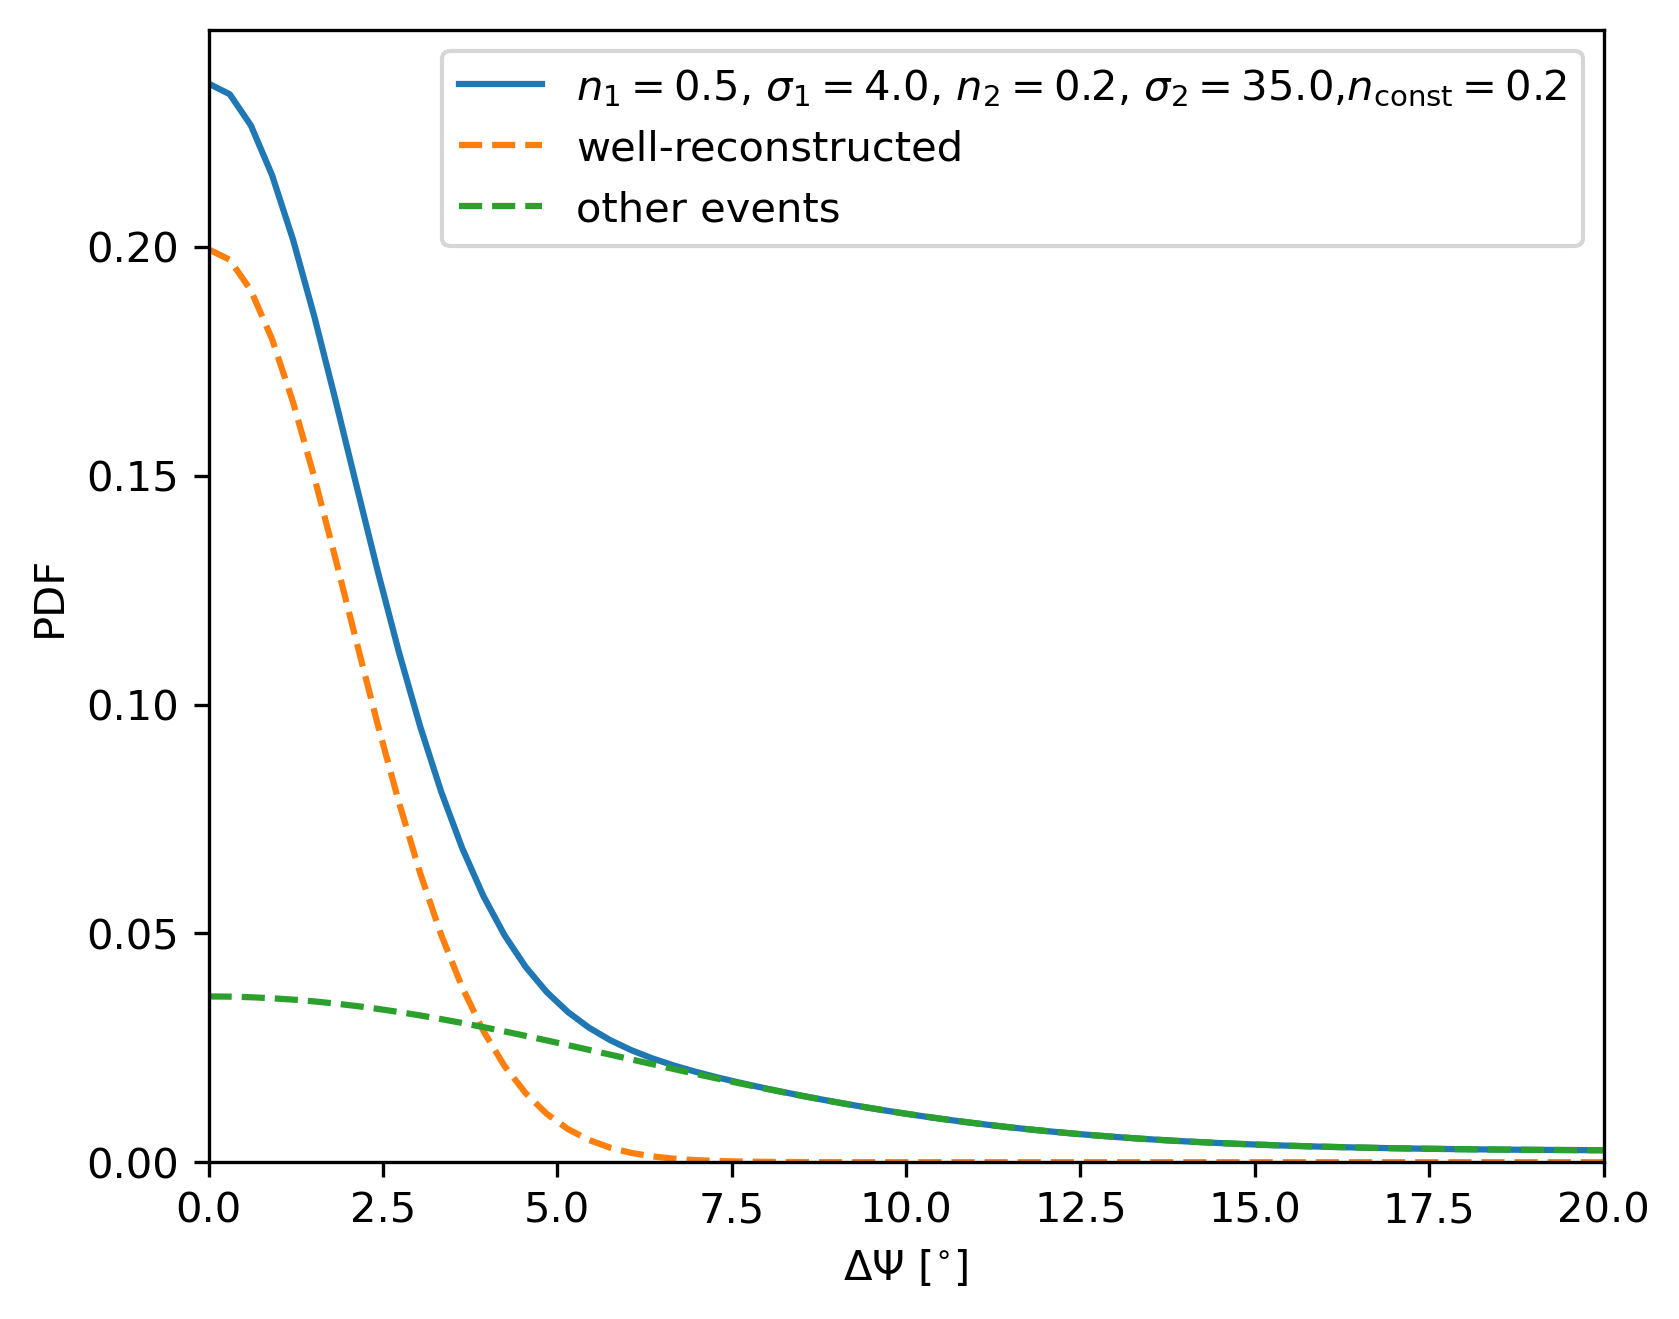

In [116]:
space_angle = np.linspace(0,30, 100)
psf = radio_response.RadioPointSpreadFunction(0.5,4,0.25,35,0.25)
plt.plot(space_angle, psf.PDF(space_angle), label=r"$n_1=%.1f$, $\sigma_1=%.1f$, $n_2=%.1f$, $\sigma_2=%.1f$,$n_\mathrm{const}=%.1f$" %(0.5,4,0.25,35,0.25))
psf = radio_response.RadioPointSpreadFunction(0.5,4,0.0,35,0.0)
plt.plot(space_angle, psf.PDF(space_angle), "--", label="well-reconstructed")
psf = radio_response.RadioPointSpreadFunction(0.0,4,0.25,35,0.25)
plt.plot(space_angle, psf.PDF(space_angle), "--", label="other events")
plt.legend()
plt.xlabel(r"$\Delta\Psi\ [^{\circ}]$")
plt.ylabel(r"PDF")
plt.xlim(0,20)
plt.ylim(0, None)
plt.savefig("radio_angular_res.pdf")

## Energy resolution

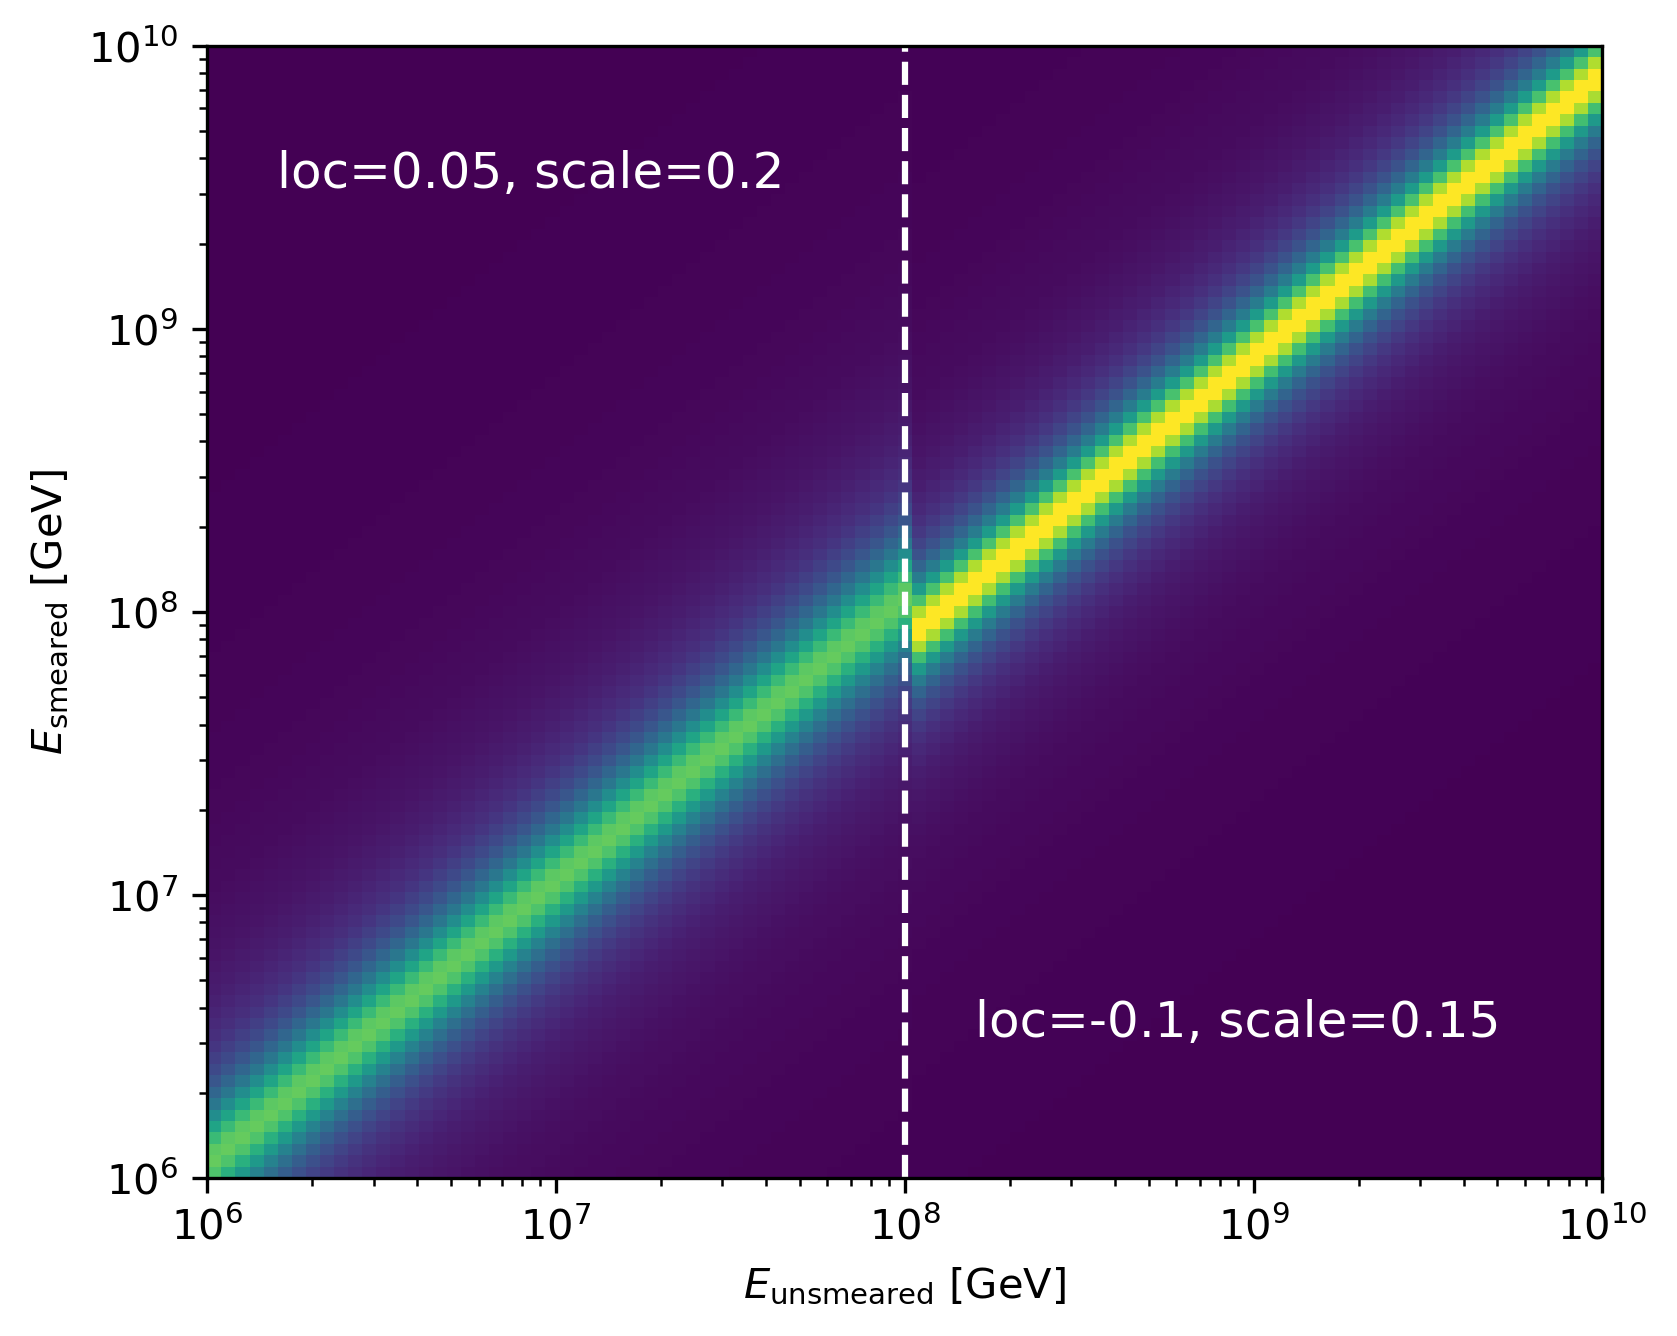

In [115]:
e_response = radio_response.RadioEnergyResolution(loc=-0.1,scale=0.15)
energy = np.logspace(6,10,100)
energy2 = np.logspace(6,10,100)
r1 = e_response.get_response_matrix(energy, energy2)
#plt.pcolormesh(e_response.get_response_matrix(energy, energy2))
e_response2 = radio_response.RadioEnergyResolution(loc=0.05,scale=0.2)
r2 = e_response2.get_response_matrix(energy, energy2)

r1[:,:50] = r2[:,:50]
plt.pcolormesh(energy,energy,r1)
plt.loglog()
plt.axvline(1e8, color="white", linestyle="--")
plt.xlabel(r"$E_\mathrm{unsmeared}$ [GeV]")
plt.ylabel(r"$E_\mathrm{smeared}$ [GeV]")
plt.text(10**6.2,10**9.5,"loc=0.05, scale=0.2", fontsize=12, color="white")
plt.text(10**8.2,10**6.5,"loc=-0.1, scale=0.15", fontsize=12, color="white")
plt.savefig("radio_energy_res.pdf")